# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
study_mouse_data_complete = pd.merge(study_results, mouse_metadata, how="left",on=["Mouse ID"])
# Display the data table for preview
study_mouse_data_complete.head()

Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
0     b128          0                45.0                 0    Capomulin   
1     f932          0                45.0                 0     Ketapril   
2     g107          0                45.0                 0     Ketapril   
3     a457          0                45.0                 0     Ketapril   
4     c819          0                45.0                 0     Ketapril   

      Sex  Age_months  Weight (g)  
0  Female           9          22  
1    Male          15          29  
2  Female           2          29  
3  Female          11          30  
4    Male          21          25

In [2]:
# Checking the number of mice.
mice_count= (len(study_mouse_data_complete["Mouse ID"].unique()))
mice_count

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse = study_mouse_data_complete.loc[study_mouse_data_complete.duplicated(subset=["Mouse ID", "Timepoint"]),"Mouse ID"].unique()
duplicate_mouse

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_data= study_mouse_data_complete[study_mouse_data_complete["Mouse ID"].isin(duplicate_mouse)==True]
duplicate_mouse_data

Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
107      g989          0           45.000000                 0     Propriva   
137      g989          0           45.000000                 0     Propriva   
329      g989          5           48.786801                 0     Propriva   
360      g989          5           47.570392                 0     Propriva   
620      g989         10           51.745156                 0     Propriva   
681      g989         10           49.880528                 0     Propriva   
815      g989         15           51.325852                 1     Propriva   
869      g989         15           53.442020                 0     Propriva   
950      g989         20           55.326122                 1     Propriva   
1111     g989         20           54.657650                 1     Propriva   
1195     g989         25           56.045564                 1     Propriva   
1380     g989         30           59.082294                 1     Propriva   
1592     g989         35           62.570880                 2     Propriva   

         Sex  Age_months  Weight (g)  
107   Female          21          26  
137   Female          21          26  
329   Female          21          26  
360   Female          21          26  
620   Female          21          26  
681   Female          21          26  
815   Female          21          26  
869   Female          21          26  
950   Female          21          26  
1111  Female          21          26  
1195  Female          21          26  
1380  Female          21          26  
1592  Female          21          26

In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_study_data_complete = study_mouse_data_complete[study_mouse_data_complete["Mouse ID"].isin(duplicate_mouse)==False]
clean_study_data_complete.head()

Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
0     b128          0                45.0                 0    Capomulin   
1     f932          0                45.0                 0     Ketapril   
2     g107          0                45.0                 0     Ketapril   
3     a457          0                45.0                 0     Ketapril   
4     c819          0                45.0                 0     Ketapril   

      Sex  Age_months  Weight (g)  
0  Female           9          22  
1    Male          15          29  
2  Female           2          29  
3  Female          11          30  
4    Male          21          25

In [6]:
# Checking the number of mice in the clean DataFrame.
new_mice_count= (len(clean_study_data_complete["Mouse ID"].unique()))
new_mice_count

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

mean_tumor_volume= clean_study_data_complete.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
median_tumor_volume=clean_study_data_complete.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]
tumor_volume_variance=clean_study_data_complete.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]
tumor_volume_stddev=clean_study_data_complete.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]
tumor_volume_stderr=clean_study_data_complete.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]

summary_statistics_table= pd.DataFrame({
    "Mean Tumor Volume": mean_tumor_volume,
    "Median Tumor Volume": median_tumor_volume,
    "Tumor Volume Variance": tumor_volume_variance,
    "Tumor Volume Std. Dev.": tumor_volume_stddev,
    "Tumor Volume Std. Err.": tumor_volume_stderr
    
})
summary_statistics_table

Mean Tumor Volume  Median Tumor Volume  Tumor Volume Variance  \
Drug Regimen                                                                  
Capomulin             40.675741            41.557809              24.947764   
Ceftamin              52.591172            51.776157              39.290177   
Infubinol             52.884795            51.820584              43.128684   
Ketapril              55.235638            53.698743              68.553577   
Naftisol              54.331565            52.509285              66.173479   
Placebo               54.033581            52.288934              61.168083   
Propriva              52.320930            50.446266              43.852013   
Ramicane              40.216745            40.673236              23.486704   
Stelasyn              54.233149            52.431737              59.450562   
Zoniferol             53.236507            51.818479              48.533355   

              Tumor Volume Std. Dev.  Tumor Volume Std. Err.  
Drug Regimen                                                  
Capomulin                   4.994774                0.329346  
Ceftamin                    6.268188                0.469821  
Infubinol                   6.567243                0.492236  
Ketapril                    8.279709                0.603860  
Naftisol                    8.134708                0.596466  
Placebo                     7.821003                0.581331  
Propriva                    6.622085                0.544332  
Ramicane                    4.846308                0.320955  
Stelasyn                    7.710419                0.573111  
Zoniferol                   6.966589                0.516398

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
agg_summary_table= clean_study_data_complete.groupby(["Drug Regimen"]).agg({"Tumor Volume (mm3)":["mean", "median", "var", "std", "sem"]})
agg_summary_table

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

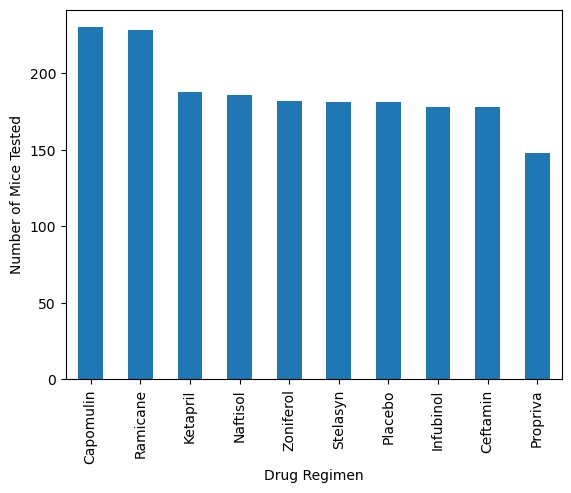

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

#create a dataframe for the Drug Regimen
regimenCount= clean_study_data_complete["Drug Regimen"].value_counts()

#establish the type of graph to display(bar)
regimenCount.plot(kind="bar")

#labels and values
plt.xlabel("Drug Regimen")
plt.xticks(rotation=90)
plt.ylabel("Number of Mice Tested")

plt.show()

Text(0, 0.5, 'Number of Mice Tested')

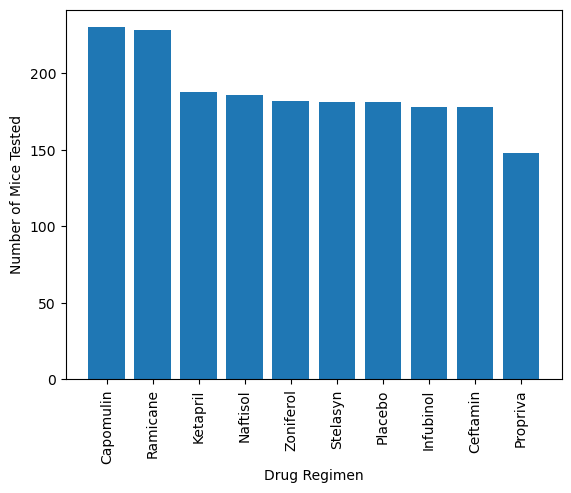

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

#x-axis
regimenCount= clean_study_data_complete["Drug Regimen"].value_counts()
x_axis= [[regimenCount]]
ticks= [x for x in x_axis]

#y axis
y_axis= [0,50,100,150,200]

#plt.bar() to generate bar chart, , alpha for opacity, align to set alignment of ticks, rotation for orientation of x axis labels
plt.bar(regimenCount.index.values,regimenCount.values,alpha=1, align= "center")

plt.xticks(rotation=90)


#labels
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")


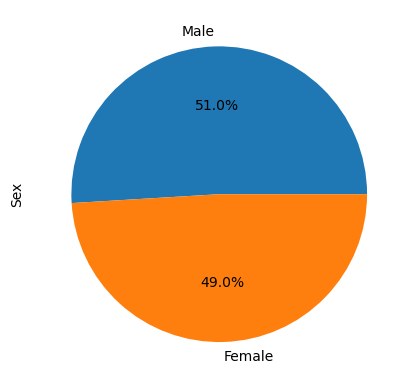

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

MaleFemaleCount= clean_study_data_complete["Sex"].value_counts()
MaleFemaleCount.plot(kind= "pie", autopct="%1.1f%%")
plt.show()

Text(0.5, 1.0, 'Sex Distribution')

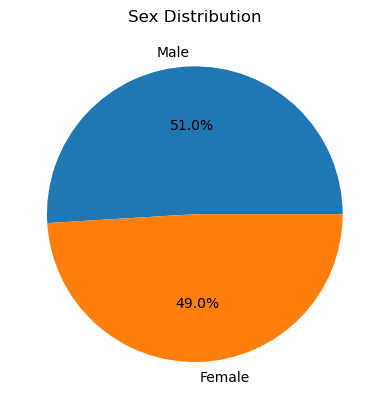

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
values= (MaleFemaleCount)
labels = ["Male", "Female"]
plt.pie(values,labels=labels,autopct="%1.1f%%")
plt.title("Sex Distribution")


## Quartiles, Outliers and Boxplots

In [21]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
groupedData=clean_study_data_complete.groupby("Mouse ID")["Timepoint"].max()
groupedDataDF= pd.DataFrame(groupedData)

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
mergedData=pd.merge(groupedDataDF ,clean_study_data_complete, how="left",on=("Mouse ID", "Timepoint"))
mergedData

Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
0       a203         45           67.973419                 2    Infubinol   
1       a251         45           65.525743                 1    Infubinol   
2       a262         45           70.717621                 4      Placebo   
3       a275         45           62.999356                 3     Ceftamin   
4       a366         30           63.440686                 1     Stelasyn   
..       ...        ...                 ...               ...          ...   
243     z435         10           48.710661                 0     Propriva   
244     z578         45           30.638696                 0     Ramicane   
245     z581         45           62.754451                 3    Infubinol   
246     z795         45           65.741070                 3     Naftisol   
247     z969         45           73.867845                 4     Naftisol   

        Sex  Age_months  Weight (g)  
0    Female          20          23  
1    Female          21          25  
2    Female          17          29  
3    Female          20          28  
4    Female          16          29  
..      ...         ...         ...  
243  Female          12          26  
244    Male          11          16  
245  Female          24          25  
246  Female          13          29  
247    Male           9          30  

[248 rows x 8 columns]

In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatments=["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumorVolData=[]
for treatment in treatments:
    newData= mergedData.loc[mergedData["Drug Regimen"]==treatment, "Tumor Volume (mm3)"]
    
    #append data
    tumorVolData.append(newData)
    
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    quartiles=newData.quantile([.25,.5,.75])
    lowerQ=quartiles[0.25]
    upperQ=quartiles[0.75]
    IQR=upperQ - lowerQ

    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset 
    # Determine outliers using upper and lower bounds
    lowerBound=lowerQ - (1.5*IQR)
    upperBound=upperQ + (1.5*IQR)
    TumorVolOutliers= newData.loc[(newData < lowerBound)|(newData > upperBound)]

    
    print(f"{treatment}'s potential outliers: {TumorVolOutliers}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


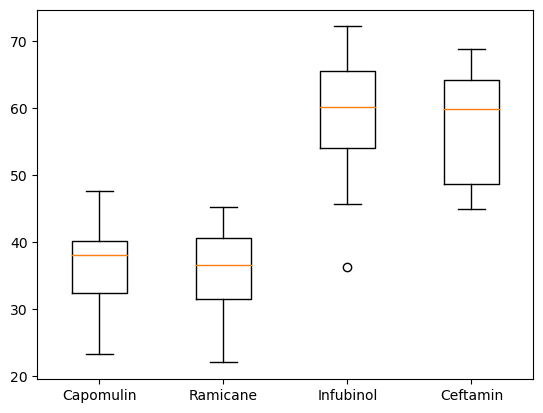

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, ax1 = plt.subplots()
ax1.set_ylabel = ("Final Tumor Volume (mm3)")
ax1.boxplot(tumorVolData,labels= treatments)
plt.show()


## Line and Scatter Plots

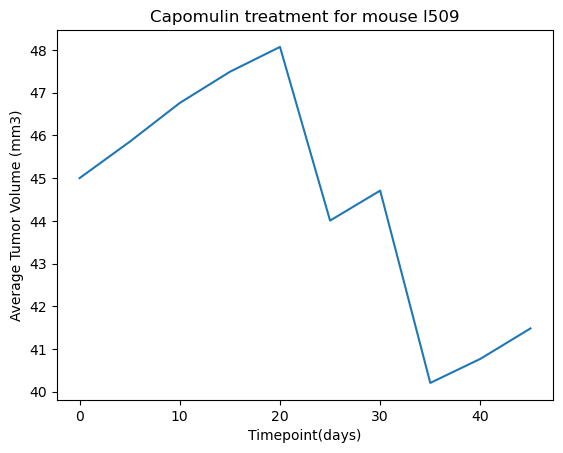

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
lineData1=clean_study_data_complete.loc[clean_study_data_complete["Drug Regimen"]=="Capomulin"]
lineData2=lineData1.loc[lineData1["Mouse ID"]=="l509"]
plt.plot(lineData2["Timepoint"],lineData2["Tumor Volume (mm3)"])
plt.xlabel("Timepoint(days)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Capomulin treatment for mouse l509")
plt.show()

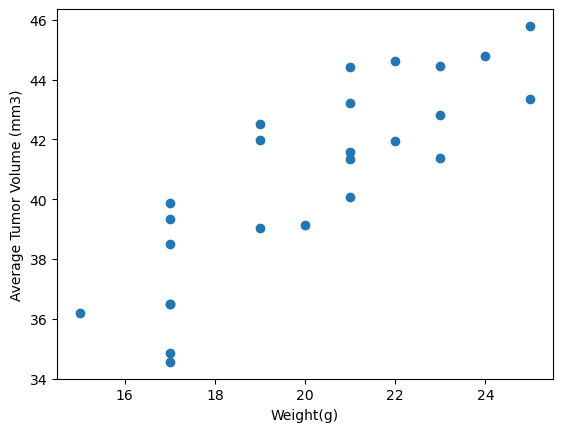

In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
scatterData=clean_study_data_complete.loc[clean_study_data_complete["Drug Regimen"]=="Capomulin"]
scatterAverage= scatterData.groupby(["Mouse ID"]).mean()
plt.scatter(scatterAverage["Weight (g)"],scatterAverage["Tumor Volume (mm3)"])
plt.xlabel("Weight(g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

In [18]:
from scipy.stats import linregress

The correlation between mouse weight and the average tumor volume is 0.84


Text(0, 50, 'y = 0.95x + 21.55')

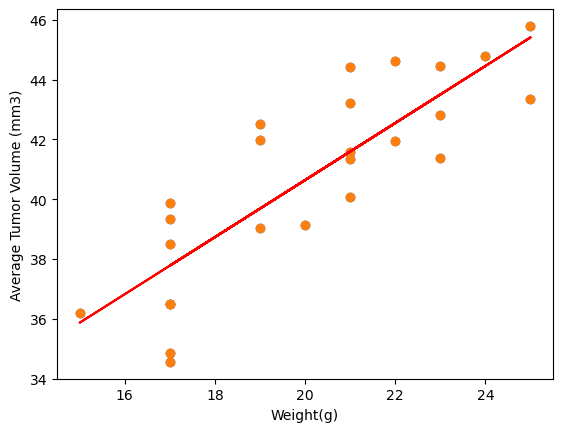

In [19]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
scatterData=clean_study_data_complete.loc[clean_study_data_complete["Drug Regimen"]=="Capomulin"]
scatterAverage= scatterData.groupby(["Mouse ID"]).mean()
plt.scatter(scatterAverage["Weight (g)"],scatterAverage["Tumor Volume (mm3)"])
plt.xlabel("Weight(g)")
plt.ylabel("Average Tumor Volume (mm3)")

#correlation coefficient
mouseWeight= scatterAverage["Weight (g)"]
avgTumorVol=scatterAverage["Tumor Volume (mm3)"]
correlation= st.pearsonr(mouseWeight,avgTumorVol)
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")

#linear regression
xValues= mouseWeight 
yValues= avgTumorVol
(slope, intercept, rvalue, pvalue, stderr) = linregress(xValues, yValues)
regress_values = xValues * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(xValues,yValues)
plt.plot(xValues,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15)

